In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

# Load data
file_path = '../dataset/data_kopi_(prov).xlsx'
df = pd.read_excel(file_path)

# Cek dan bersihkan data: gunakan hanya kolom numerik
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Simpan hasil evaluasi
results = []

# Eksperimen dengan cluster dari 2 hingga 7
for k in range(2, 8):
    start_time = time.time()

    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)

    silhouette = round(silhouette_score(X_scaled, labels), 2)
    dbi = round(davies_bouldin_score(X_scaled, labels), 2)
    exec_time = round(time.time() - start_time, 4)

    results.append({
        'Algorithm': 'K-Means',
        'Clusters Num.': k,
        'Avg. Silhouette': silhouette,
        'Davies Bouldin Index': dbi,
        'Execution Time (s)': exec_time
    })

#hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

Algorithm  Clusters Num.  Avg. Silhouette  Davies Bouldin Index  Execution Time (s)
  K-Means              2             0.63                  0.62              0.2803
  K-Means              3             0.41                  0.76              0.0060
  K-Means              4             0.32                  0.91              0.0063
  K-Means              5             0.27                  1.13              0.0079
  K-Means              6             0.24                  0.93              0.0091
  K-Means              7             0.28                  0.85              0.0090


In [4]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

# Load data ekspor
file_path = '../dataset/data_kopi_(prov).xlsx'
df = pd.read_excel(file_path)

# Seleksi kolom numerik dan drop nilai NaN
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Simpan hasil evaluasi
results = []

# Eksperimen Agglomerative Clustering untuk k = 2 sampai 7
for k in range(2, 8):
    start_time = time.time()

    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(X_scaled)

    silhouette = round(silhouette_score(X_scaled, labels), 2)
    dbi = round(davies_bouldin_score(X_scaled, labels), 2)
    exec_time = round(time.time() - start_time, 4)

    results.append({
        'Algorithm': 'Agglomerative',
        'Clusters Num.': k,
        'Avg. Silhouette': silhouette,
        'Davies Bouldin Index': dbi,
        'Execution Time (s)': exec_time
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

    Algorithm  Clusters Num.  Avg. Silhouette  Davies Bouldin Index  Execution Time (s)
Agglomerative              2             0.70                  0.45              0.2099
Agglomerative              3             0.41                  0.76              0.0035
Agglomerative              4             0.39                  0.77              0.0030
Agglomerative              5             0.36                  0.60              0.0035
Agglomerative              6             0.38                  0.54              0.0033
Agglomerative              7             0.39                  0.60              0.0040


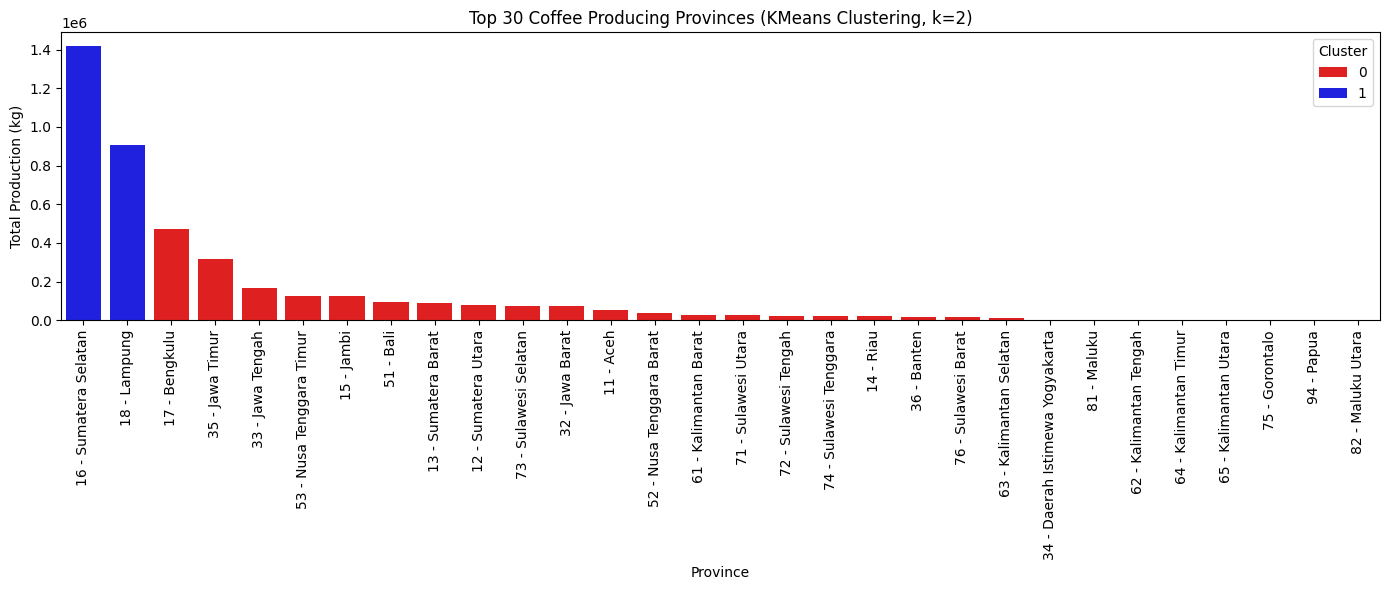

In [1]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Langkah 2: Baca data
file_path = "../dataset/data kopi (prov).xlsx"  # Nama file
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Langkah 3: Ganti nama kolom 'Lokasi' menjadi 'Provinsi'
df = df.rename(columns={'Lokasi': 'Provinsi'})

# Langkah 4: Hitung total produksi dari seluruh tahun
produksi_cols = [col for col in df.columns if "Produksi" in col]
df['Total_Produksi'] = df[produksi_cols].sum(axis=1)

# Langkah 5: Ambil kolom Provinsi dan Total Produksi
df_total = df[['Provinsi', 'Total_Produksi']].copy()

# Langkah 6: Clustering dengan KMeans (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df_total['Cluster'] = kmeans.fit_predict(df_total[['Total_Produksi']])

# Langkah 7: Ambil 30 provinsi dengan produksi tertinggi
top30 = df_total.sort_values('Total_Produksi', ascending=False).head(30)

# Langkah 8: Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top30,
    x='Provinsi',
    y='Total_Produksi',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 30 Coffee Producing Provinces (KMeans Clustering, k=2)")
plt.xlabel("Province")
plt.ylabel("Total Production (kg)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


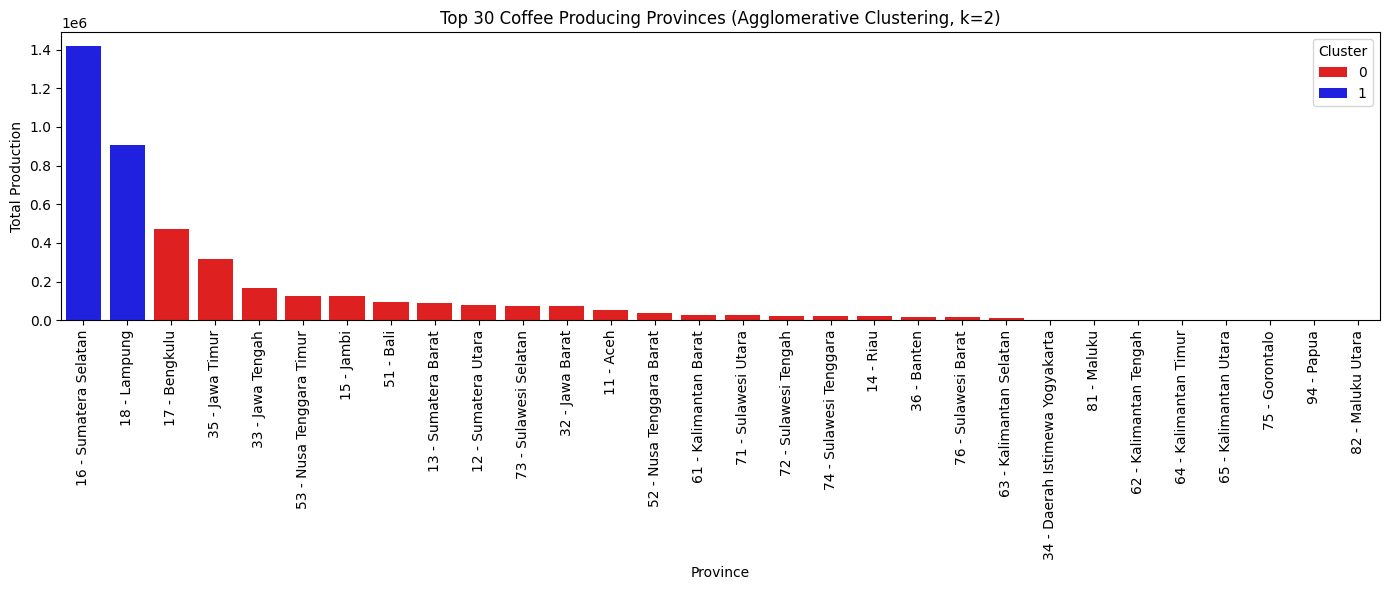

In [5]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Langkah 3: Baca data
file_path = "../dataset/data_kopi_(prov).xlsx"  # Ini adalah nama file yang diupload
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Langkah 4: Ganti nama kolom 'Lokasi' menjadi 'Provinsi'
df = df.rename(columns={'Lokasi': 'Provinsi'})

# Langkah 5: Hitung total produksi dari seluruh tahun
produksi_cols = [col for col in df.columns if "Produksi" in col]
df['Total_Produksi'] = df[produksi_cols].sum(axis=1)

# Langkah 6: Ambil kolom Provinsi dan Total Produksi
df_total = df[['Provinsi', 'Total_Produksi']].copy()

# Langkah 7: Clustering dengan Agglomerative Hierarchical Clustering (k=2)
agglo = AgglomerativeClustering(n_clusters=2)
df_total['Cluster'] = agglo.fit_predict(df_total[['Total_Produksi']])

# Langkah 8: Ambil 30 provinsi dengan produksi tertinggi
top30 = df_total.sort_values('Total_Produksi', ascending=False).head(30)

# Langkah 9: Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top30,
    x='Provinsi',
    y='Total_Produksi',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 30 Coffee Producing Provinces (Agglomerative Clustering, k=2)")
plt.xlabel("Province")
plt.ylabel("Total Production")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

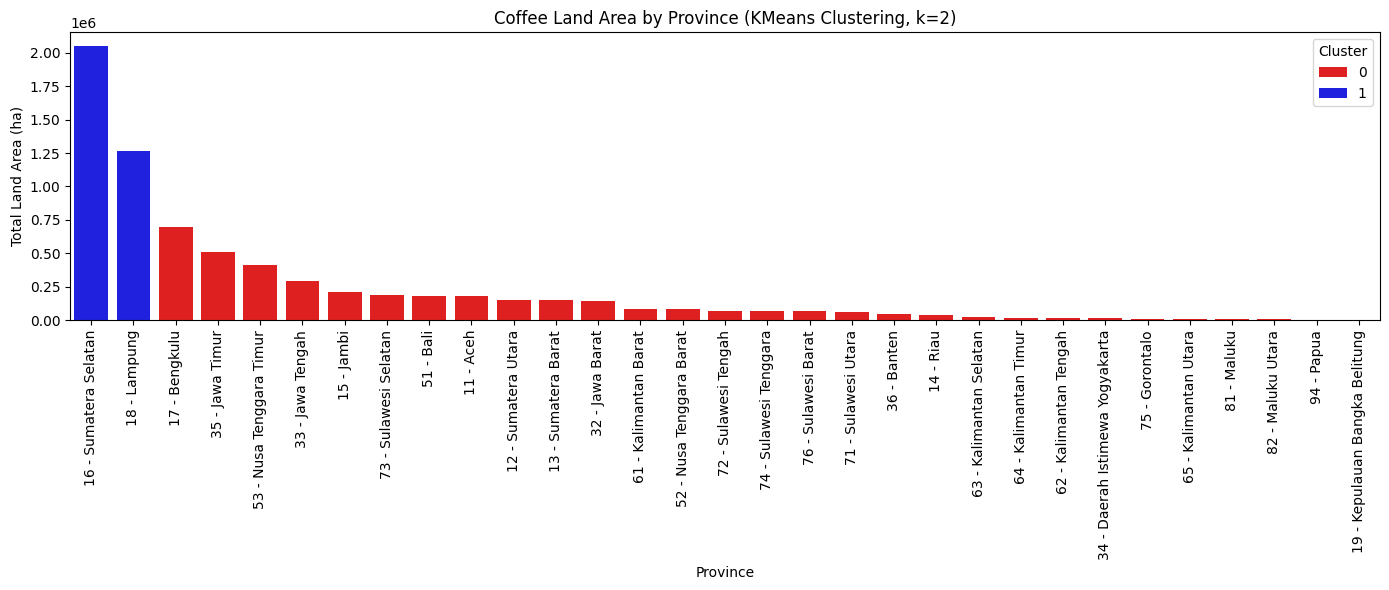

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Langkah 3: Baca data
file_path = "../dataset/data_kopi_(prov).xlsx"  # Ini adalah nama file yang diupload
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Hitung total luas lahan kopi dari 2015–2022
luas_cols = [col for col in df.columns if "Luas" in col]
df['Total_Luas'] = df[luas_cols].sum(axis=1)

# Ambil lokasi dan total luas
df_luas = df[['Lokasi', 'Total_Luas']].copy()

# Clustering dengan KMeans (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df_luas['Cluster'] = kmeans.fit_predict(df_luas[['Total_Luas']])

# Ambil 20 kabupaten/kota dengan luas lahan terbesar
top20_luas = df_luas.sort_values('Total_Luas', ascending=False).head(35)

# Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top20_luas,
    x='Lokasi',
    y='Total_Luas',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Coffee Land Area by Province (KMeans Clustering, k=2)")
plt.xlabel("Province")
plt.ylabel("Total Land Area (ha)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


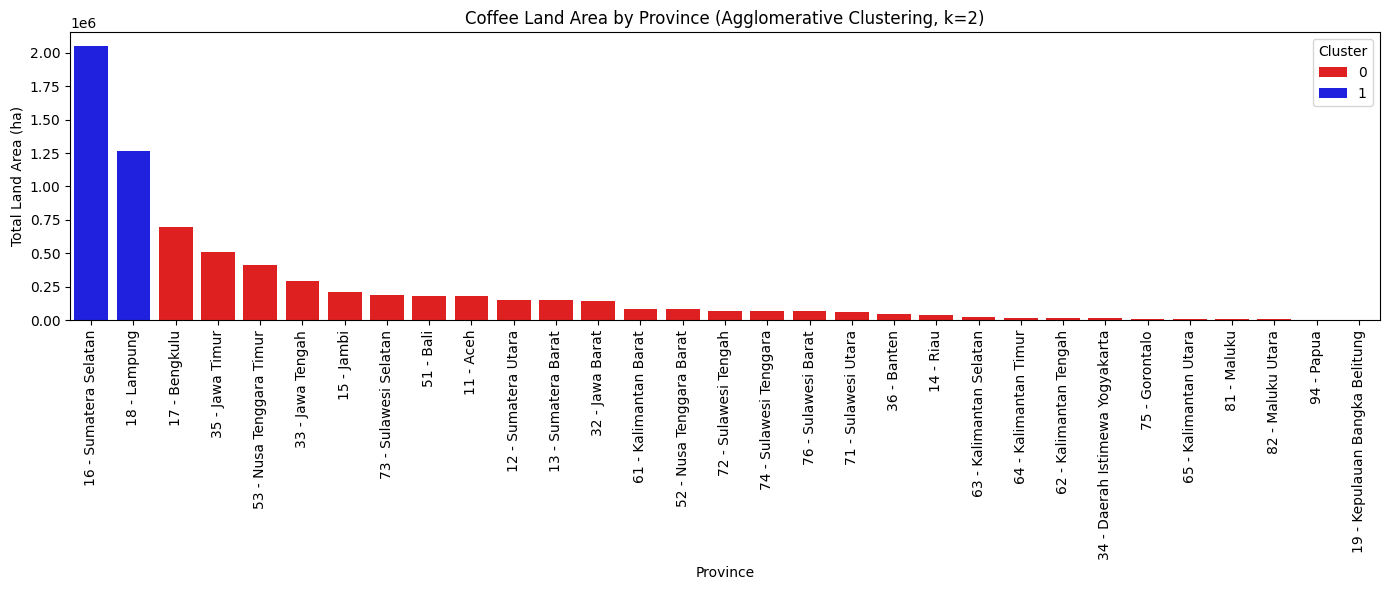

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Langkah 1: Baca data
file_path = "../dataset/data kopi (prov).xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Langkah 2: Hitung total luas lahan kopi dari 2015–2022
luas_cols = [col for col in df.columns if "Luas" in col]
df['Total_Luas'] = df[luas_cols].sum(axis=1)

# Langkah 3: Ambil provinsi dan total luas
df_luas = df[['Lokasi', 'Total_Luas']].copy()

# Langkah 4: Clustering dengan Agglomerative Clustering (k=2)
agglo = AgglomerativeClustering(n_clusters=2)
df_luas['Cluster'] = agglo.fit_predict(df_luas[['Total_Luas']])

# Langkah 5: Ambil 35 provinsi dengan luas lahan terbesar
top35_luas = df_luas.sort_values('Total_Luas', ascending=False).head(35)

# Langkah 6: Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top35_luas,
    x='Lokasi',
    y='Total_Luas',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Coffee Land Area by Province (Agglomerative Clustering, k=2)")
plt.xlabel("Province")
plt.ylabel("Total Land Area (ha)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


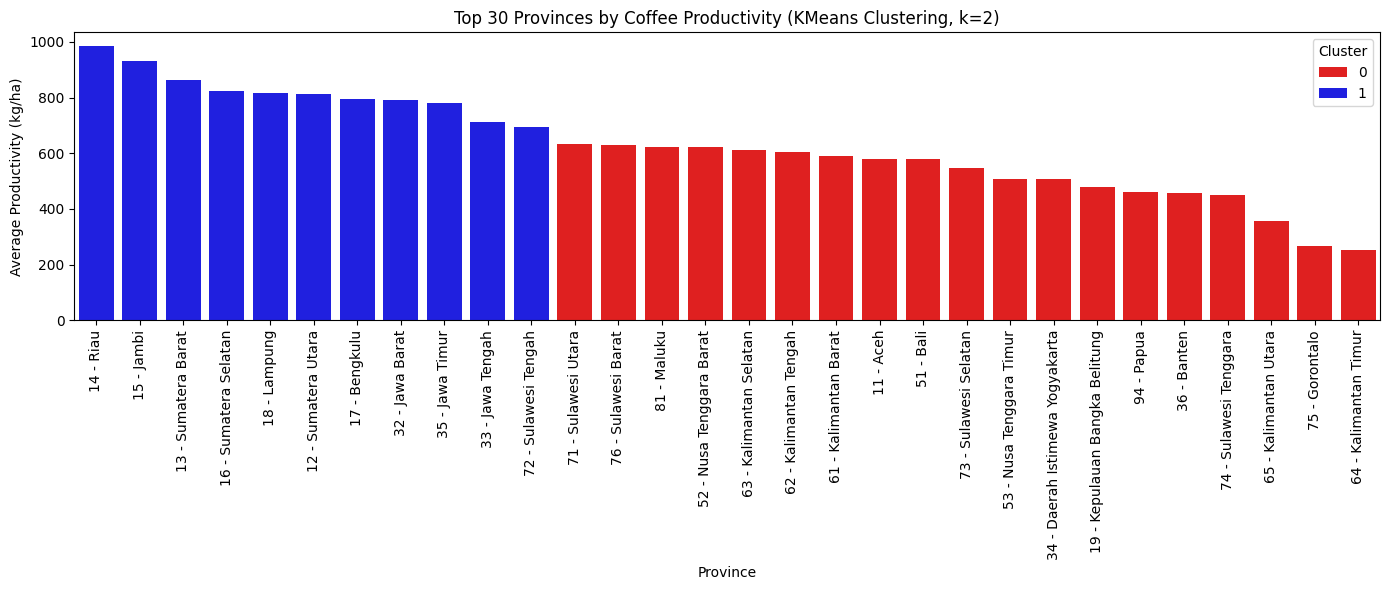

In [9]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Langkah 2: Baca file Excel provinsi
df = pd.read_excel("../dataset/data_kopi_(prov).xlsx", sheet_name='Sheet1')

# Langkah 3: Ganti nama kolom 'Lokasi' menjadi 'Provinsi'
df = df.rename(columns={'Lokasi': 'Provinsi'})

# Langkah 4: Hitung rata-rata produktivitas kopi per provinsi (2015–2022)
produktivitas_cols = [col for col in df.columns if "Produktivitas" in col]
df['Rata2_Produktivitas'] = df[produktivitas_cols].mean(axis=1)
df_prov = df[['Provinsi', 'Rata2_Produktivitas']].copy()

# Langkah 5: Clustering dengan KMeans (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df_prov['Cluster'] = kmeans.fit_predict(df_prov[['Rata2_Produktivitas']])

# Langkah 6: Ambil 20 provinsi dengan produktivitas tertinggi
top20_prov = df_prov.sort_values('Rata2_Produktivitas', ascending=False).head(30)

# Langkah 7: Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top20_prov,
    x='Provinsi',
    y='Rata2_Produktivitas',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 30 Provinces by Coffee Productivity (KMeans Clustering, k=2)")
plt.xlabel("Province")
plt.ylabel("Average Productivity (kg/ha)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


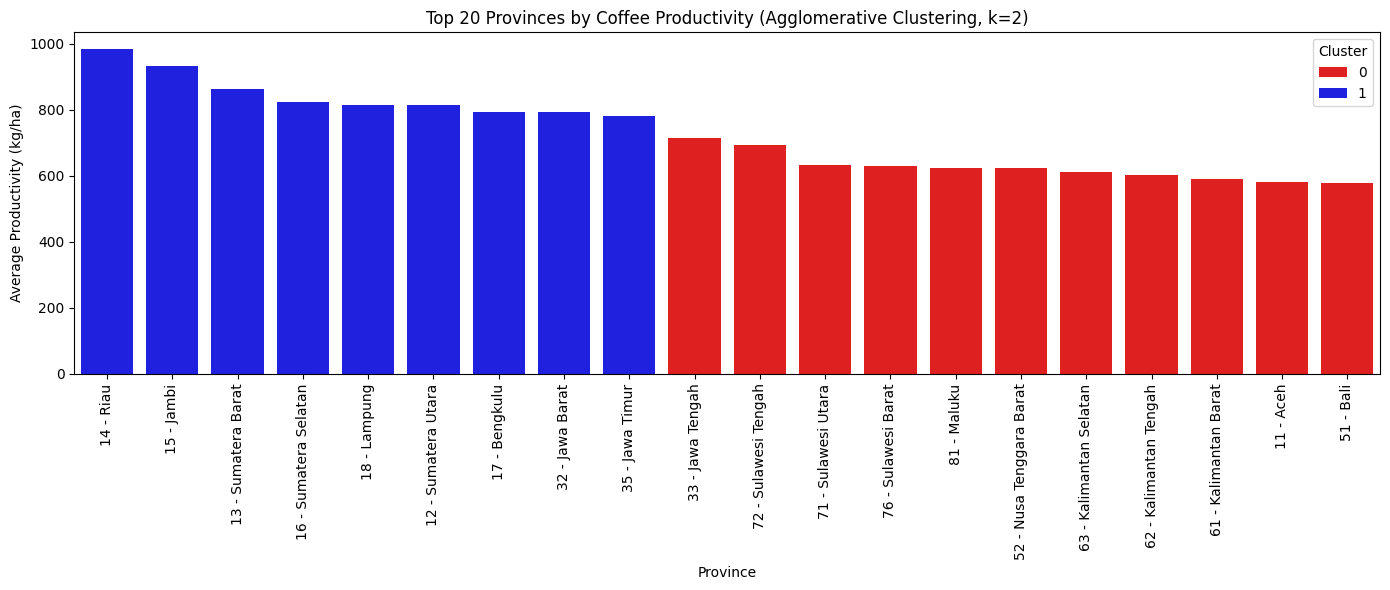

In [3]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

# Langkah 2: Baca file Excel provinsi
df = pd.read_excel("../dataset/data kopi (prov).xlsx", sheet_name='Sheet1')

# Langkah 3: Ganti nama kolom 'Lokasi' menjadi 'Provinsi'
df = df.rename(columns={'Lokasi': 'Provinsi'})

# Langkah 4: Hitung rata-rata produktivitas kopi per provinsi (2015–2022)
produktivitas_cols = [col for col in df.columns if "Produktivitas" in col]
df['Rata2_Produktivitas'] = df[produktivitas_cols].mean(axis=1)
df_prov = df[['Provinsi', 'Rata2_Produktivitas']].copy()

# Langkah 5: Clustering dengan Agglomerative Clustering (k=2)
agglo = AgglomerativeClustering(n_clusters=2)
df_prov['Cluster'] = agglo.fit_predict(df_prov[['Rata2_Produktivitas']])

# Langkah 6: Ambil 20 provinsi dengan produktivitas tertinggi
top20_prov = df_prov.sort_values('Rata2_Produktivitas', ascending=False).head(20)

# Langkah 7: Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top20_prov,
    x='Provinsi',
    y='Rata2_Produktivitas',
    hue='Cluster',
    palette={0: 'red', 1: 'blue'}
)

plt.title("Top 20 Provinces by Coffee Productivity (Agglomerative Clustering, k=2)")
plt.xlabel("Province")
plt.ylabel("Average Productivity (kg/ha)")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


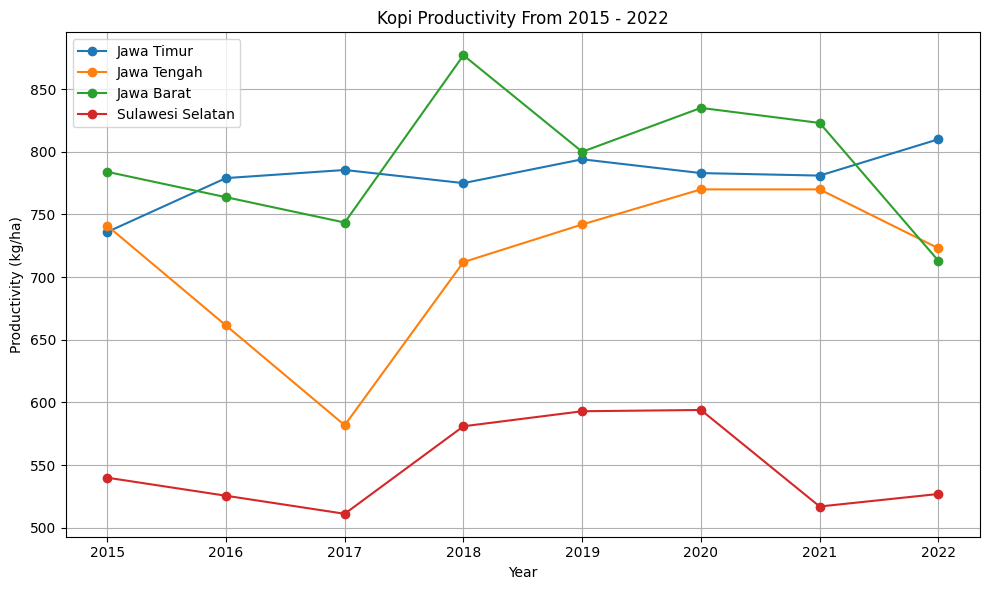

In [12]:
# Langkah 1: Import library
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 3: Baca data
df = pd.read_excel("../dataset/data_kopi_(prov).xlsx", sheet_name='Sheet1')
df = df.rename(columns={'Lokasi': 'Provinsi'})  # Rename untuk konsistensi

# Langkah 4: Pilih provinsi yang ingin dianalisis (edit sesuai kebutuhan)
provinsi_terpilih = ['35 - Jawa Timur', '33 - Jawa Tengah', '32 - Jawa Barat', '73 - Sulawesi Selatan']

# Langkah 5: Ambil kolom tahun dan ubah menjadi format yang mudah diolah
tahun = list(range(2015, 2023))
produktivitas_cols = [f'Produktivitas {t}' for t in tahun]

# Langkah 6: Buat plot
plt.figure(figsize=(10, 6))
for prov in provinsi_terpilih:
    data_prov = df[df['Provinsi'] == prov]
    if not data_prov.empty:
        plt.plot(tahun,
                 data_prov[produktivitas_cols].values.flatten(),
                 marker='o',
                 label=prov.split(' - ')[1])  # Ambil hanya nama provinsinya

# Langkah 7: Label dan gaya grafik
plt.title("Kopi Productivity From 2015 - 2022")
plt.xlabel("Year")
plt.ylabel("Productivity (kg/ha)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


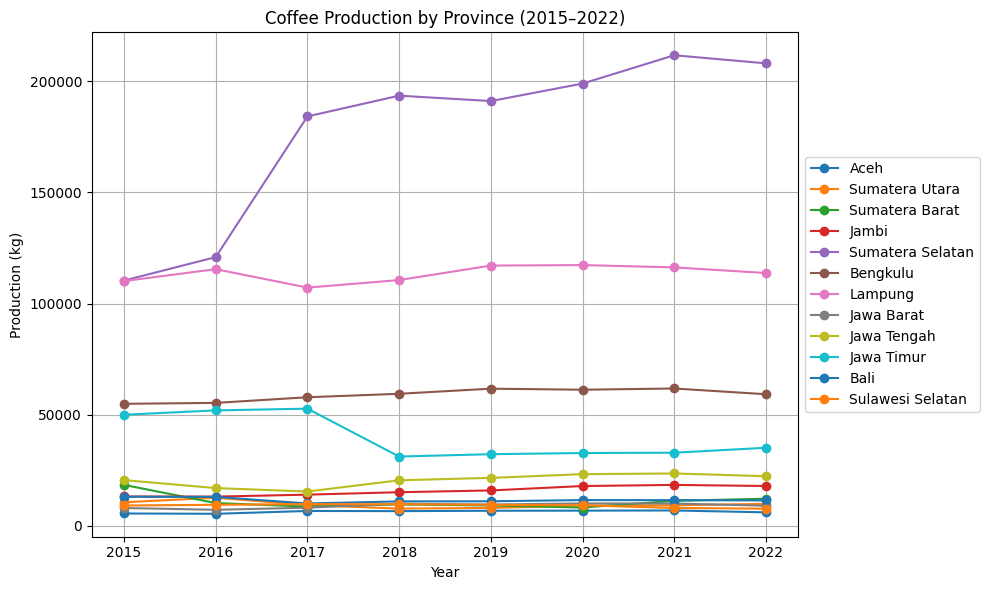

In [13]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset provinsi
file_path_prov = "../dataset/data_kopi_(prov).xlsx"
df_prov = pd.read_excel(file_path_prov, sheet_name='Sheet1')
df_prov = df_prov.rename(columns={"Lokasi": "Provinsi"})

# Tahun dan kolom produksi
tahun = list(range(2015, 2023))
produksi_cols = [f'Produksi {t}' for t in tahun]

# Pilih provinsi untuk divisualisasikan
provinsi_terpilih = [
    '11 - Aceh', '12 - Sumatera Utara', '13 - Sumatera Barat',
    '15 - Jambi', '16 - Sumatera Selatan', '17 - Bengkulu',
    '18 - Lampung', '32 - Jawa Barat', '33 - Jawa Tengah',
    '35 - Jawa Timur', '51 - Bali', '73 - Sulawesi Selatan'
]

# Plot produksi per tahun
plt.figure(figsize=(10, 6))
for prov in provinsi_terpilih:
    data = df_prov[df_prov['Provinsi'] == prov]
    if not data.empty:
        plt.plot(
            tahun,
            data[produksi_cols].values.flatten(),
            marker='o',
            label=prov.split(' - ')[1]
        )

# Atur tampilan grafik
plt.title("Coffee Production by Province (2015–2022)")
plt.xlabel("Year")
plt.ylabel("Production (kg)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


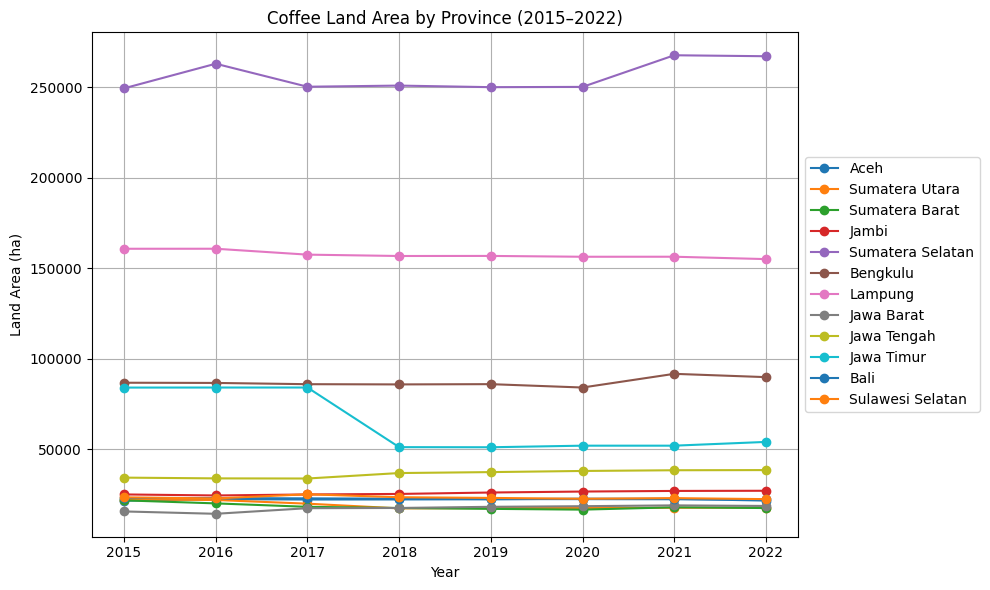

In [4]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset provinsi
file_path_prov = "../dataset/data kopi (prov).xlsx"
df_prov = pd.read_excel(file_path_prov, sheet_name='Sheet1')
df_prov = df_prov.rename(columns={"Lokasi": "Provinsi"})

# Tahun dan kolom luas lahan
tahun = list(range(2015, 2023))
luas_cols = [f'Luas {t}' for t in tahun]

# Pilih provinsi untuk divisualisasikan
provinsi_terpilih = [
    '11 - Aceh', '12 - Sumatera Utara', '13 - Sumatera Barat',
    '15 - Jambi', '16 - Sumatera Selatan', '17 - Bengkulu',
    '18 - Lampung', '32 - Jawa Barat', '33 - Jawa Tengah',
    '35 - Jawa Timur', '51 - Bali', '73 - Sulawesi Selatan'
]

# Plot luas lahan per tahun
plt.figure(figsize=(10, 6))
for prov in provinsi_terpilih:
    data = df_prov[df_prov['Provinsi'] == prov]
    if not data.empty:
        plt.plot(
            tahun,
            data[luas_cols].values.flatten(),
            marker='o',
            label=prov.split(' - ')[1]
        )

# Atur tampilan grafik
plt.title("Coffee Land Area by Province (2015–2022)")
plt.xlabel("Year")
plt.ylabel("Land Area (ha)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# Langkah 1: Import library
import pandas as pd
import folium
from sklearn.cluster import KMeans

# Langkah 2: Baca file Excel provinsi
df = pd.read_excel("../dataset/data kopi (prov).xlsx", sheet_name='Sheet1')

# Langkah 3: Ganti nama kolom jika perlu
df = df.rename(columns={'Lokasi': 'Provinsi'})  # pastikan kolom koordinat bernama 'Latitude' dan 'Longitude'

# Langkah 4: Hitung total produksi dari 2015–2022
produksi_cols = [col for col in df.columns if "Produksi" in col]
df['Total_Produksi'] = df[produksi_cols].sum(axis=1)

# Langkah 5: Filter data yang memiliki koordinat lengkap
df_map = df.dropna(subset=['Latitude', 'Longitude']).copy()

# Langkah 6: Clustering dengan KMeans (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df_map['Cluster'] = kmeans.fit_predict(df_map[['Total_Produksi']])

# Langkah 7: Buat peta interaktif Folium
map_prov = folium.Map(location=[-2.5, 117], zoom_start=5, tiles='cartodbpositron')

for _, row in df_map.iterrows():
    warna = 'red' if row['Cluster'] == 0 else 'blue'
    label = 'Low' if row['Cluster'] == 0 else 'High'
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color=warna,
        fill=True,
        fill_opacity=0.8,
        popup=folium.Popup(
            f"<b>{row['Provinsi']}</b><br>Cluster: {label}<br>Total Production: {int(row['Total_Produksi']):,} kg",
            max_width=300
        )
    ).add_to(map_prov)

# Tampilkan peta
map_prov
